In [1]:
pip install openml


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries and packages
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#nashivill 43734
#istanvul 43688
# load dataset directly from openML 
dataset_id = 44989
dataset = openml.datasets.get_dataset(dataset_id)
house, *_ = dataset.get_data()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [4]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

**Data Exploration**

In [5]:
# Display the first 10 rows of the data
house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [6]:
house.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014,5,21
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015,2,23
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014,6,23
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015,1,16
21612,325000.0,2,0.75,1020.0,1076.0,2.0,0,0,3,7,1020.0,0.0,2008.0,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014,10,15


In [7]:
house.size

475486

In [8]:
# Shape of the dataset
house.shape

(21613, 22)

In [9]:
# Get information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  uint8   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  float64 
 4   sqft_lot       21613 non-null  float64 
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  uint8   
 7   view           21613 non-null  uint8   
 8   condition      21613 non-null  uint8   
 9   grade          21613 non-null  uint8   
 10  sqft_above     21613 non-null  float64 
 11  sqft_basement  21613 non-null  float64 
 12  yr_built       21613 non-null  float64 
 13  yr_renovated   21613 non-null  float64 
 14  zipcode        21613 non-null  category
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 non-null  

**Statistical Tests**

In [10]:
# Get descriptive statistics
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# Calculate the mean count of lightning strikes for each weekday.
house[['bedrooms']].groupby(['bedrooms']).value_counts()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

/var/folders/67/4ltrm0810d91qhxpnv3hb4dc0000gn/T/ipykernel_56862/2031218033.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house.corr()


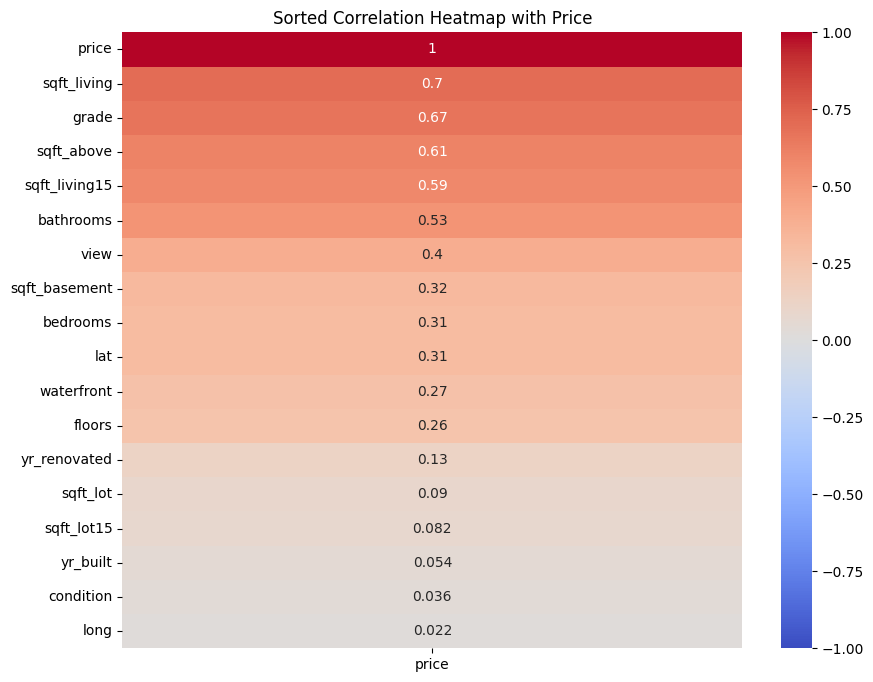

In [12]:
# Assuming 'house' is your DataFrame
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr()

# Sort the correlation values with respect to 'price'
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Create a new correlation matrix based on the sorted order
sorted_correlation_matrix = correlation_matrix.loc[sorted_correlation.index, ['price']]

sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sorted Correlation Heatmap with Price')
plt.show()

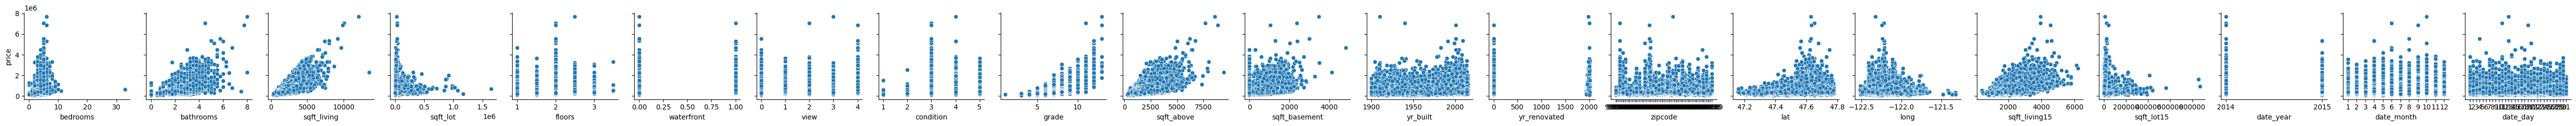

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day']


In [17]:
# Assuming 'house' is your DataFrame
sns.pairplot(house, x_vars=house.columns[1:], y_vars='price')
plt.show()

# Assuming 'house' is your DataFrame
columns_list = house.columns.tolist()
print(columns_list)


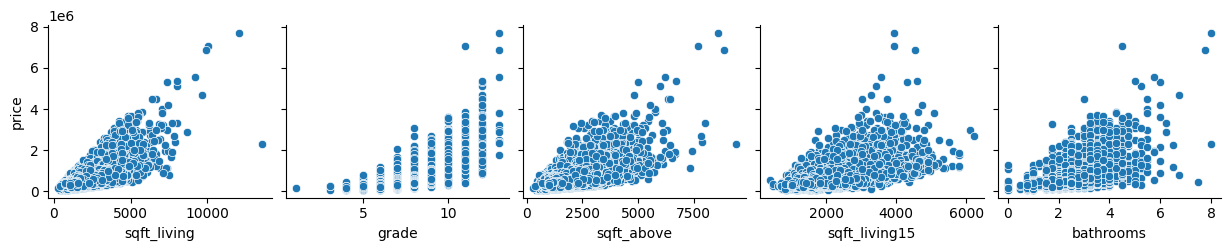

In [19]:
# Assuming 'house' is your DataFrame
columns_of_interest = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms']  # Add the columns you are interested in
subset_df = house[columns_of_interest]

sns.pairplot(house, x_vars=subset_df, y_vars='price')
plt.show()


In [14]:
count_cols = ['bedrooms',
              'bathrooms',
              'sqft_living',
              'floors',
              'sqft_lot',
              ]

for column in count_cols:
    q1 = house[column].quantile(0.25)
    q3 = house[column].quantile(0.75)
    iqr = q3 - q1
    median = house[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (house[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, bedrooms: 1935
Number of outliers, bathrooms: 1288
Number of outliers, sqft_living: 1366
Number of outliers, floors: 8
Number of outliers, sqft_lot: 2938


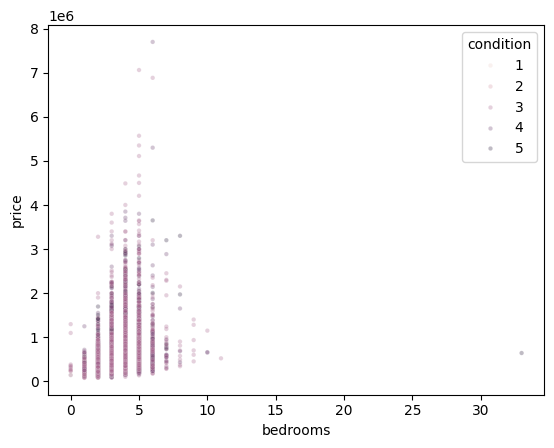

In [15]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=house["bedrooms"], y=house["price"],
                hue=house["condition"], s=10, alpha=.3)
plt.show()